In [7]:
# for running on Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
dict_type = {
    'cailuong'  : 'CaiLuong',
    'catru'     : 'Catru',
    'cheo'      : 'Cheo'
}

In [7]:
def get_samples_paths(music_type):
  wav_paths = [
      "/content/drive/MyDrive/datasets/wav"
      + '/' + music_type
      + '/' + dict_type[music_type]
      + '.00'
      + str(ii)
      + ".wav"
      for ii in range(3)
      ]
  print('Links:', wav_paths)
  return wav_paths

def load_samples(wav_paths):
  list_y = []
  list_sr = []
  for ii in range(3):
    wav_path = wav_paths[ii]
    y, sr = librosa.load(wav_path, sr=None)
    list_y.append(y)
    list_sr.append(sr)
  return list_y, list_sr

def convert_to_array(list_y):
  return np.array(list_y)

def examine_y(y_array, list_sr):
  print('y_array: ', y_array)
  print('Shape: ', y_array.shape)
  print('Min: ', np.min(y_array))
  print('Max: ', np.max(y_array))
  print('Mean: ', np.mean(y_array))

  num_instances = y_array.shape[0]
  for i in range(num_instances):
    y = y_array[i]
    sr = list_sr[i]

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Audio Waveform - Instance {i+1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def calculate_stft(list_y, n_fft=512, hop_length=1024):
    list_D = []
    for y in list_y:
        D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
        list_D.append(D)
    D_array = np.array(list_D)
    return D_array

def examine_D_array(D_array):
    print('Shape: ', D_array.shape)
    print('Max: ', np.max(D_array))
    print('Min: ', np.min(D_array))
    print(D_array)

def plot_spectrograms(D_array, sr, hop_length=1024):
    num_instances = D_array.shape[0]
    for i in range(num_instances):
        D = D_array[i]
        D_mag = np.abs(D)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(D_mag,
                                 sr=sr,
                                 hop_length=hop_length,
                                 x_axis='time',
                                 y_axis='log')
        plt.colorbar()
        plt.title(f'Spectrogram - Instance {i+1}')  # Add title with instance number
        plt.show()

def calculate_mel_spec_dB(D_array, sr, n_fft=512, hop_length=1024, n_mels=128, fmax=8000):
    mel_spec_dB_list = []
    for D in D_array:
        S = np.abs(D)
        mel_spec = librosa.feature.melspectrogram(S=S**2, sr=sr, n_fft=n_fft,
                                                   hop_length=hop_length, n_mels=n_mels, fmax=fmax)
        mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec_dB_list.append(mel_spec_dB)
    mel_spec_dB_array = np.array(mel_spec_dB_list)
    return mel_spec_dB_array

def plot_mel_spectrograms(mel_spec_dB_array, sr):
    num_instances = mel_spec_dB_array.shape[0]
    for i in range(num_instances):
        mel_spec_dB = mel_spec_dB_array[i]

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spec_dB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectrogram - Instance {i+1}')  # Add title with instance number
        plt.show()

def EDA_three_samples(music_type):
  wav_paths = get_samples_paths(music_type)
  list_y, list_sr = load_samples(wav_paths)

  # Examine on list_sr and list_y
  print('Tần số của 5 tệp đầu: ', set(list_sr))
  examine_y(convert_to_array(list_y), list_sr)

  # Plotting spectrograms
  D_array = calculate_stft(list_y)
  examine_D_array(D_array)
  plot_spectrograms(D_array, list_sr[0])

  # Plotting Mel_spectrograms
  mel_spec_dB_array = calculate_mel_spec_dB(D_array, list_sr[0])
  print('Shape: ', mel_spec_dB_array.shape)
  plot_mel_spectrograms(mel_spec_dB_array, list_sr[0])

Links: ['/content/drive/MyDrive/datasets/wav/cailuong/CaiLuong.000.wav', '/content/drive/MyDrive/datasets/wav/cailuong/CaiLuong.001.wav', '/content/drive/MyDrive/datasets/wav/cailuong/CaiLuong.002.wav']
Tần số của 5 tệp đầu:  {22050}
y_array:  [[ 0.          0.          0.         ...  0.07992554  0.04415894
   0.00421143]
 [-0.00790405  0.02603149  0.03234863 ... -0.12594604 -0.14743042
  -0.1621399 ]
 [-0.17214966 -0.17199707 -0.17230225 ...  0.12896729 -0.09750366
  -0.55670166]]
Shape:  (3, 661500)
Min:  -0.8882446
Max:  0.7397766
Mean:  0.00013973322


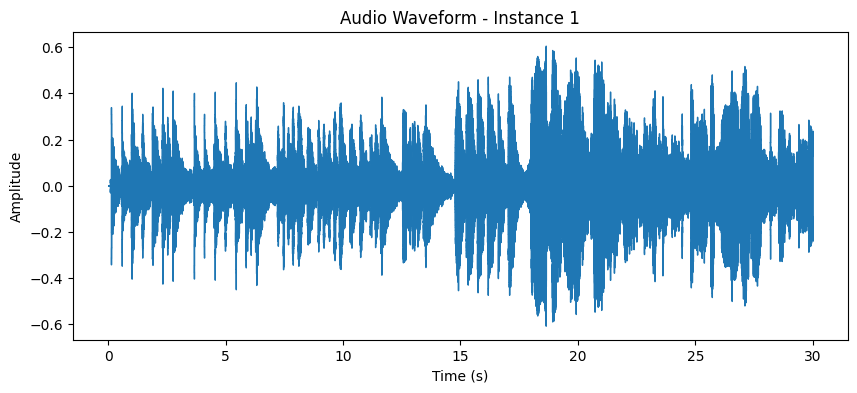

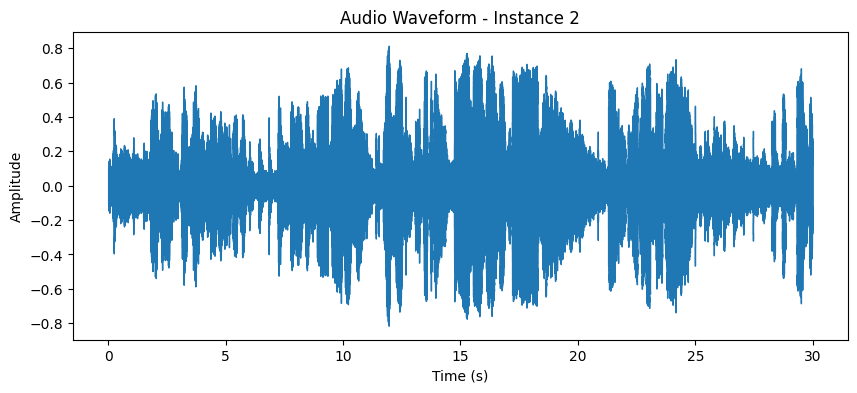

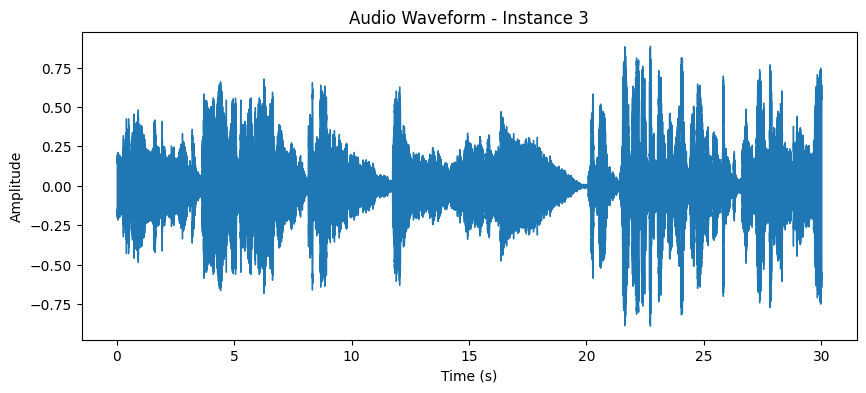

Shape:  (3, 257, 646)
Max:  (63.135693+24.650082j)
Min:  (-47.029427-4.1827807j)
[[[ 1.3894224e-05+0.0000000e+00j -6.6071312e-05+0.0000000e+00j
    4.9381621e-02+0.0000000e+00j ...  4.8441461e-01+0.0000000e+00j
    1.1915936e+00+0.0000000e+00j -9.4369149e-01+0.0000000e+00j]
  [-2.7060328e-06+1.1165263e-05j  4.9650371e-05+3.7086920e-05j
   -9.3271956e-03+2.6574221e-01j ...  4.6597940e-01+2.3299747e+00j
   -2.1979065e+00-1.2984991e+00j  2.3750508e+00+2.3152184e-02j]
  [-9.8131022e-06-3.6602668e-07j -3.7913029e-05-3.0776213e-05j
    5.4108545e-02+2.8100902e-02j ... -1.0324055e+00-2.8682270e+00j
    2.3238420e+00+1.8457695e+00j -3.1928408e+00-4.4741328e-03j]
  ...
  [-1.7462176e-05-2.9160164e-03j  1.7143439e-03+1.9807117e-03j
   -9.4971569e-05-3.2348700e-03j ...  2.6405470e-03-2.2930643e-03j
   -7.3012512e-04+2.6527687e-04j  3.1344540e-04-9.8608865e-04j]
  [ 2.2022142e-03+1.7628722e-03j -3.8525667e-03-2.1735197e-03j
    1.6337665e-03+2.1348866e-03j ... -3.8044190e-03+3.4917765e-03j
   -8.3

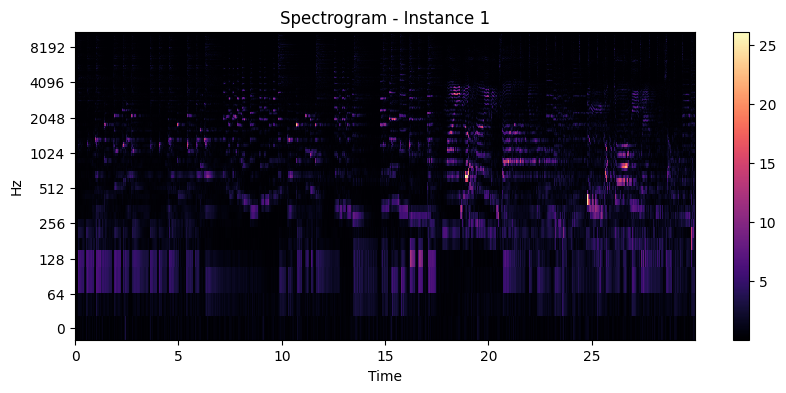

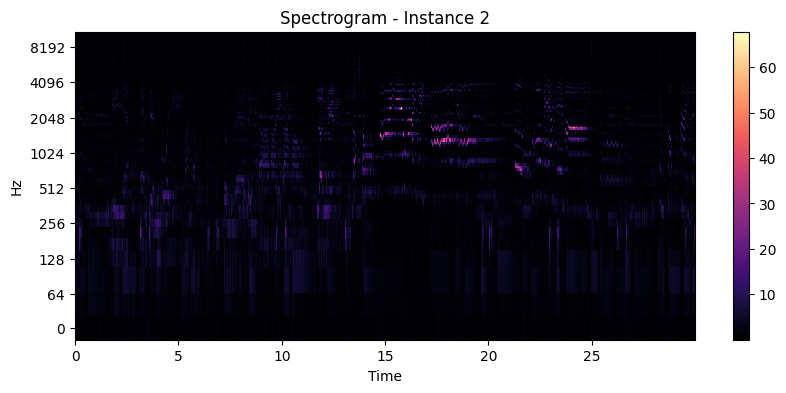

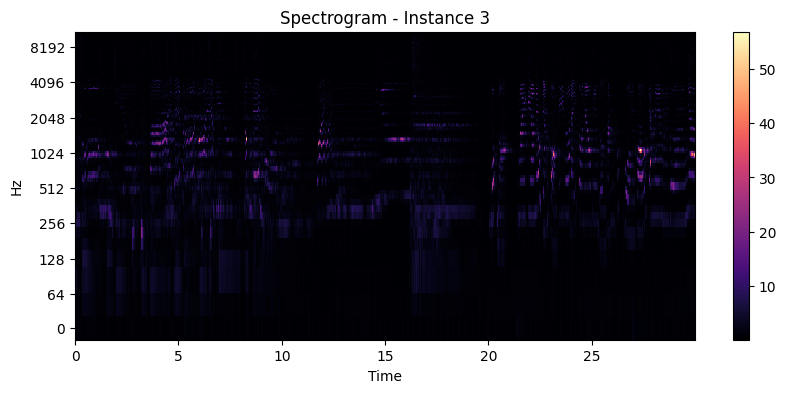

Shape:  (3, 128, 646)


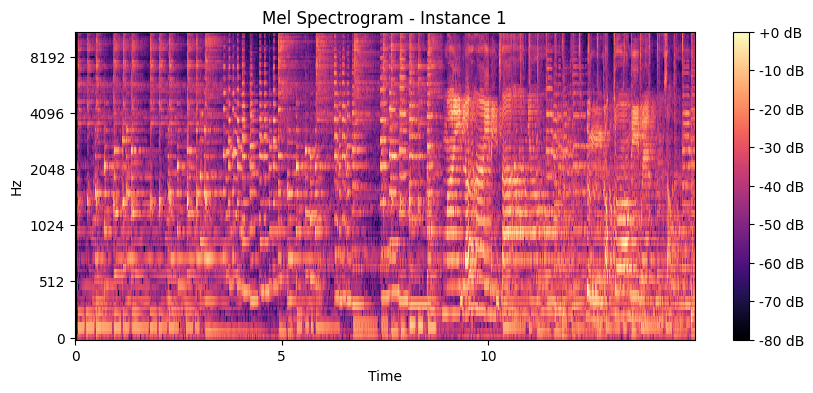

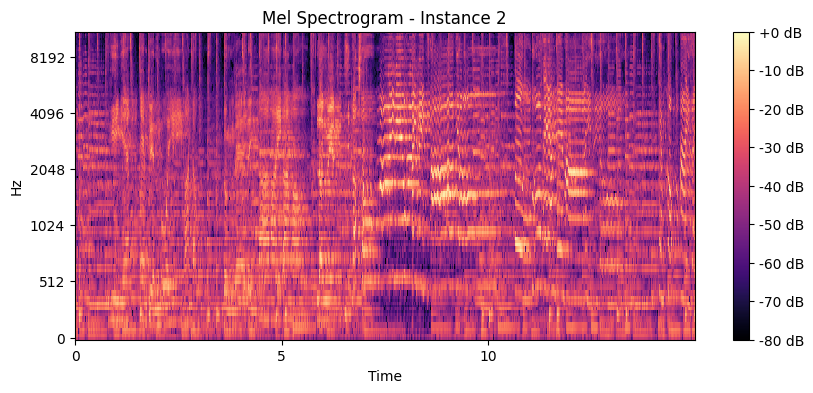

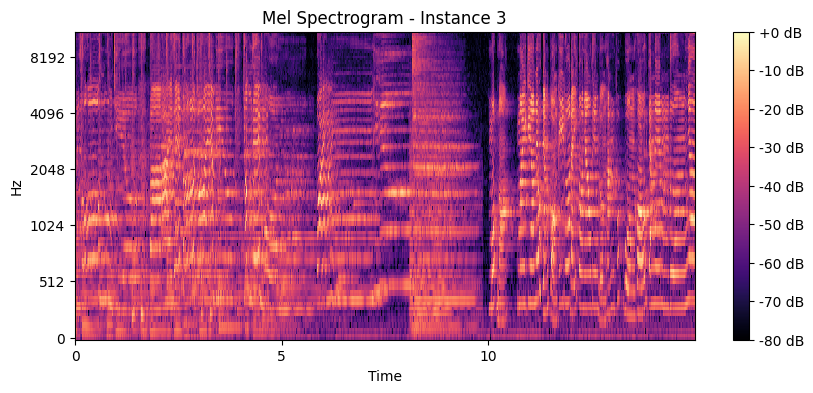

In [8]:
EDA_three_samples('cailuong')

Links: ['/content/drive/MyDrive/datasets/wav/catru/Catru.000.wav', '/content/drive/MyDrive/datasets/wav/catru/Catru.001.wav', '/content/drive/MyDrive/datasets/wav/catru/Catru.002.wav']
Tần số của 5 tệp đầu:  {22050}
y_array:  [[ 3.0517578e-05 -6.1035156e-05  3.0517578e-05 ...  5.4443359e-02
   3.1799316e-02 -5.8898926e-03]
 [-1.5289307e-02  2.1942139e-02  4.4952393e-02 ...  9.9945068e-02
   7.6751709e-02  5.4962158e-02]
 [ 8.6761475e-02  1.3809204e-01  9.0454102e-02 ...  1.1001587e-01
  -1.4129639e-01 -2.7206421e-01]]
Shape:  (3, 661500)
Min:  -1.0
Max:  0.9999695
Mean:  -0.00015643032


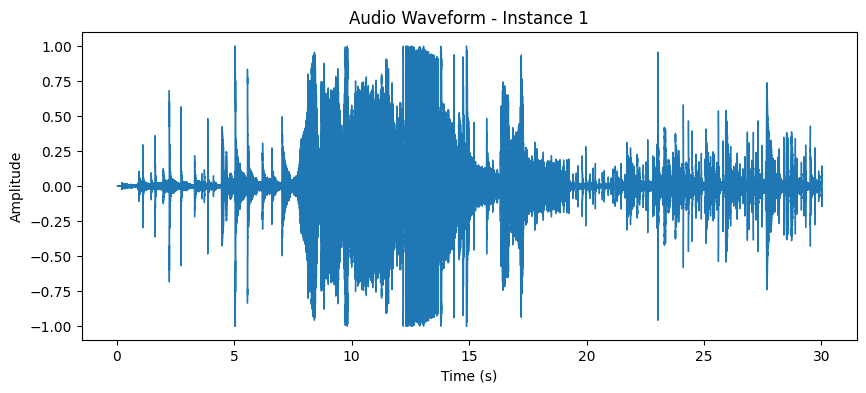

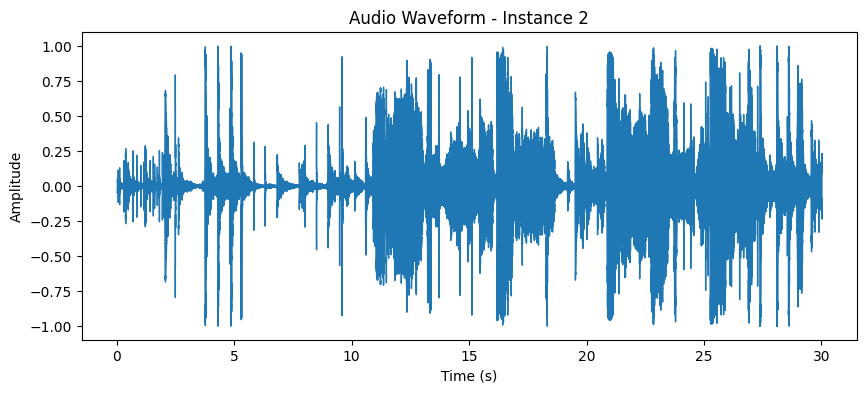

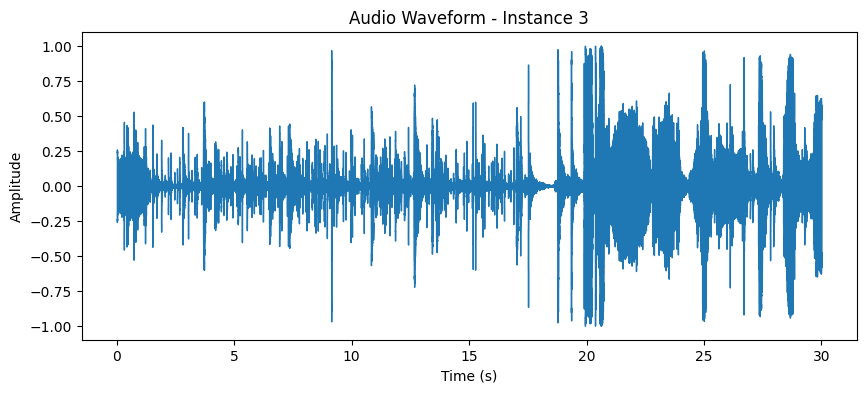

Shape:  (3, 257, 646)
Max:  (79.10505-8.274505j)
Min:  (-82.99942+43.012836j)
[[[-1.01301271e-06+0.0000000e+00j -1.09202207e-04+0.0000000e+00j
    1.87458027e-05+0.0000000e+00j ... -1.36592453e-02+0.0000000e+00j
    1.20804496e-01+0.0000000e+00j -3.41449790e-02+0.0000000e+00j]
  [-8.51078858e-06-2.4912545e-06j  8.83238463e-05+4.2479664e-05j
   -4.01429315e-06+4.4717683e-05j ... -1.42854437e-01+1.1507771e-01j
   -1.51773423e-01-3.4195414e-01j  2.21536644e-02-4.5747352e-03j]
  [ 2.12521445e-06-1.4852045e-05j -3.12489101e-05-4.9861450e-05j
   -2.43860832e-05-4.8528022e-05j ...  1.59021780e-01-3.9608189e-01j
   -3.38544846e-01+1.0682948e+00j  1.01783266e-02+1.9790754e-02j]
  ...
  [ 1.50479621e-03-4.7146421e-04j  7.75236476e-05+1.2052351e-03j
   -1.21314486e-03+1.2784783e-03j ... -3.49952630e-03-4.3192464e-03j
    1.52535655e-03-1.1361151e-03j  2.95389589e-04-4.3877331e-03j]
  [ 1.17861389e-04+1.0844617e-03j  1.52514933e-03-4.0123321e-04j
    2.66420026e-03-1.3347241e-03j ...  3.04071186e-

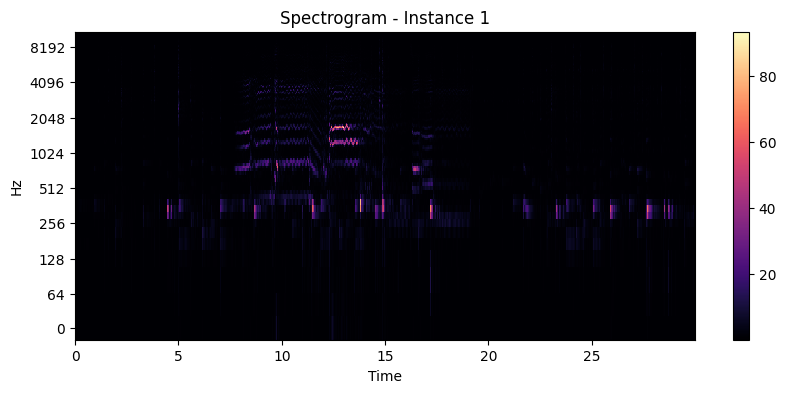

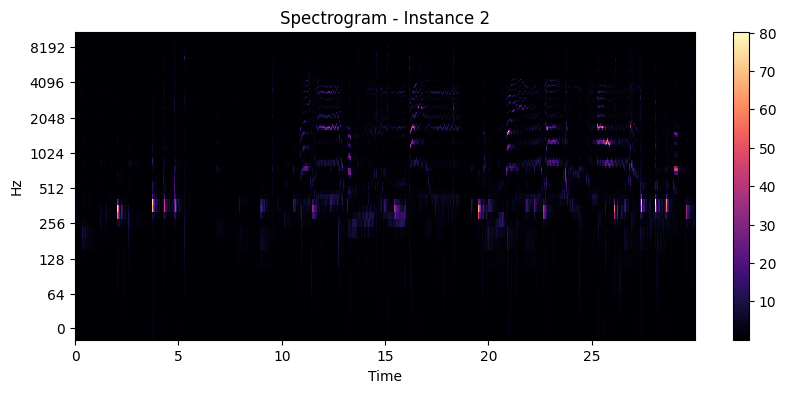

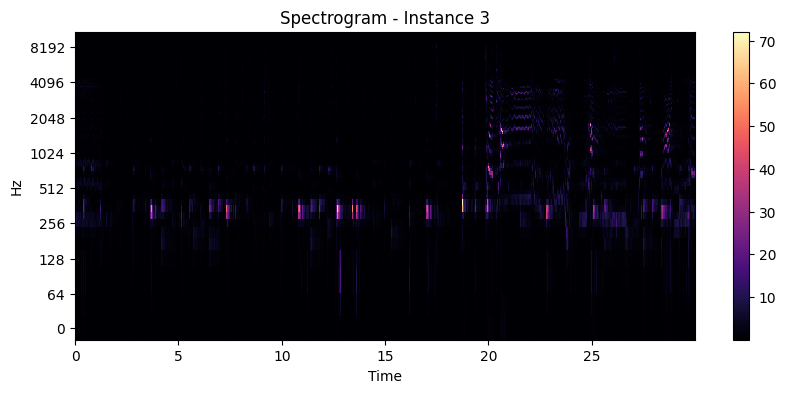

Shape:  (3, 128, 646)


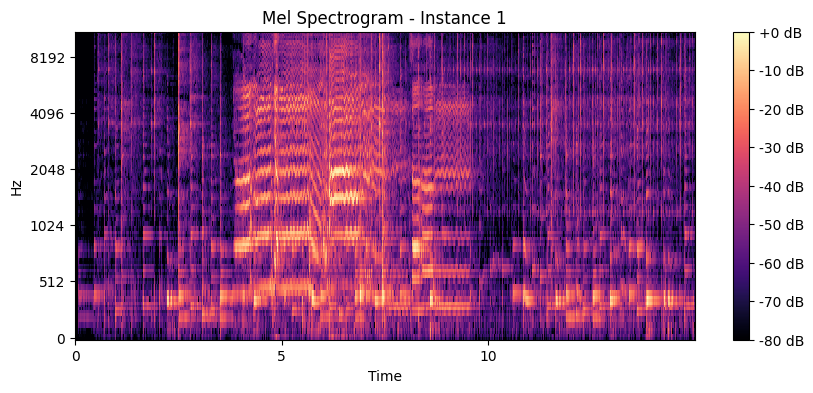

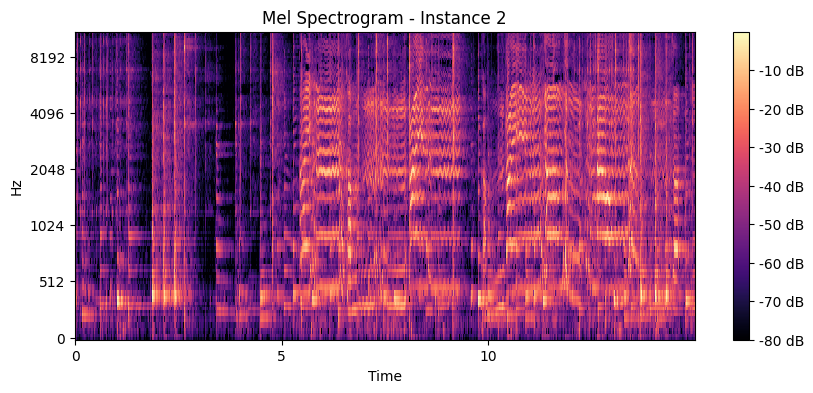

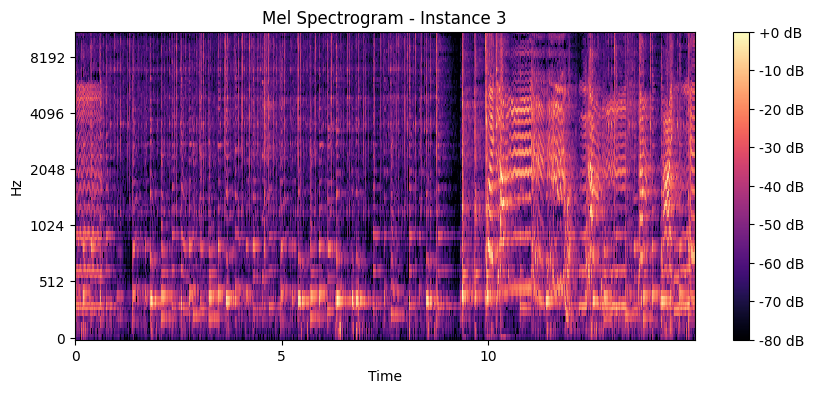

In [9]:
EDA_three_samples('catru')

Links: ['/content/drive/MyDrive/datasets/wav/cheo/Cheo.000.wav', '/content/drive/MyDrive/datasets/wav/cheo/Cheo.001.wav', '/content/drive/MyDrive/datasets/wav/cheo/Cheo.002.wav']
Tần số của 5 tệp đầu:  {22050}
y_array:  [[ 0.0000000e+00  3.0517578e-05 -6.1035156e-05 ...  1.1166382e-01
   1.1343384e-01  1.0430908e-01]
 [ 7.3852539e-02  4.2663574e-02  5.2246094e-02 ... -1.3220215e-01
  -1.0568237e-01 -8.0444336e-02]
 [ 7.2814941e-02  1.2918091e-01  1.5646362e-01 ... -3.0160522e-01
  -3.0209351e-01 -2.3236084e-01]]
Shape:  (3, 661500)
Min:  -1.0
Max:  0.9999695
Mean:  0.005959444


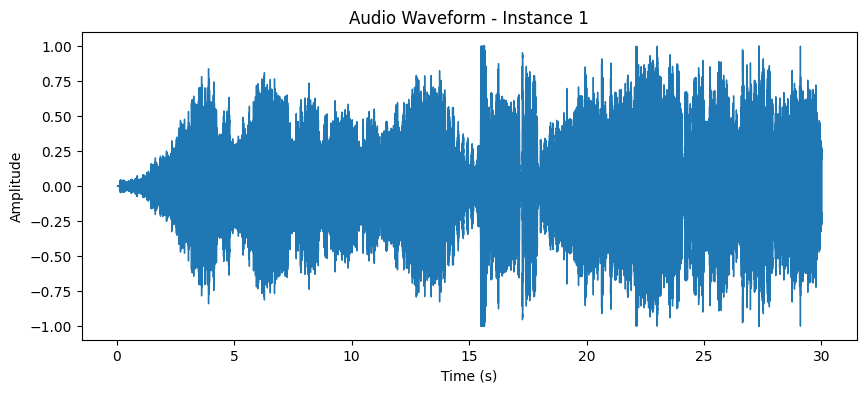

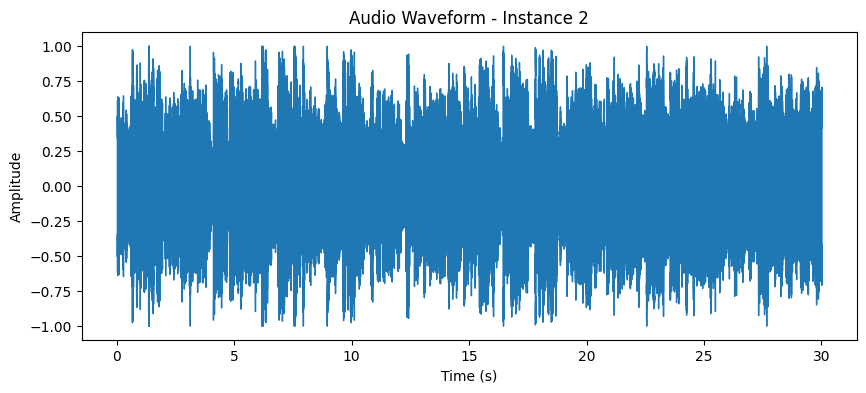

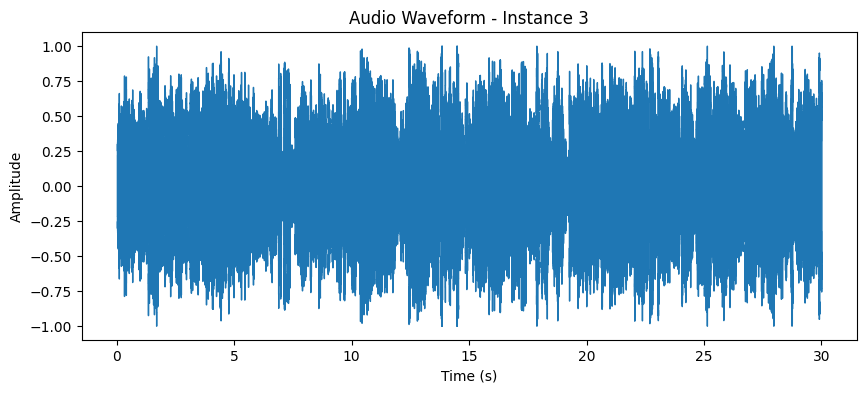

Shape:  (3, 257, 646)
Max:  (43.997-10.076199j)
Min:  (-53.843037-0.62771475j)
[[[ 1.2638214e-06+0.0000000e+00j  2.2372778e-04+0.0000000e+00j
    7.5513935e-01+0.0000000e+00j ...  1.2684354e+00+0.0000000e+00j
    2.0514841e+00+0.0000000e+00j  1.7445877e+00+0.0000000e+00j]
  [-1.2989717e-05+2.4041312e-06j -5.1718822e-04-1.7782759e-05j
   -4.0864739e-01+4.9718684e-01j ... -4.9006939e-01-5.4224055e-02j
   -1.1034812e+00-1.8706132e-01j -8.4102798e-01+7.6289818e-02j]
  [ 5.8150194e-06-3.0974799e-05j  5.5373710e-04-2.7670903e-04j
    9.4693787e-03-3.1806511e-01j ... -2.3230443e-02-1.0645692e-01j
    3.3160755e-01+2.8587535e-01j -2.6055571e-01+3.3722028e-01j]
  ...
  [-8.6804685e-05+8.8859844e-04j  2.6101705e-03+7.9742126e-04j
    1.8613305e-03+5.7845167e-04j ... -3.7685415e-04-1.9859057e-03j
   -1.2295148e-03-9.1853214e-04j -2.1500066e-03+6.0299635e-03j]
  [ 2.6503903e-05+5.6115776e-05j  1.2090534e-03-1.3650910e-03j
   -1.4016274e-03-1.9602336e-04j ... -2.3792849e-03+1.0368299e-03j
    1.608

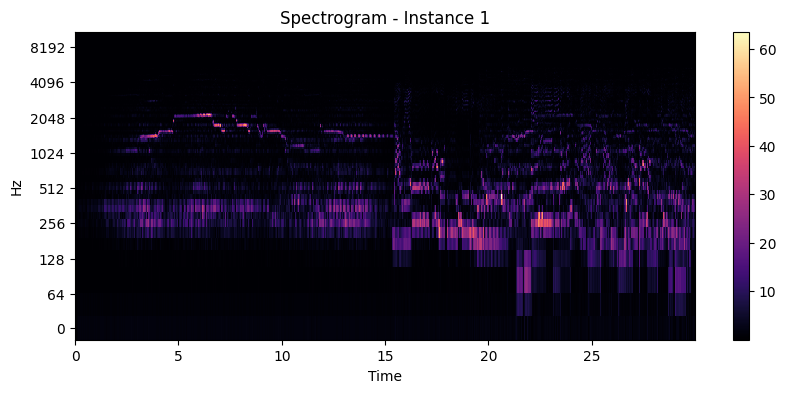

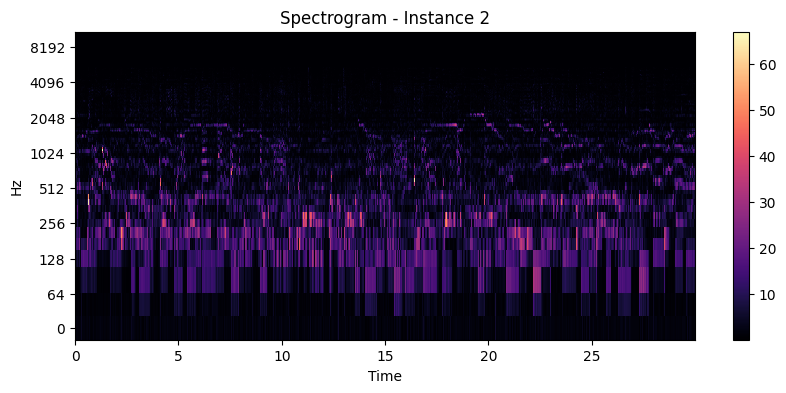

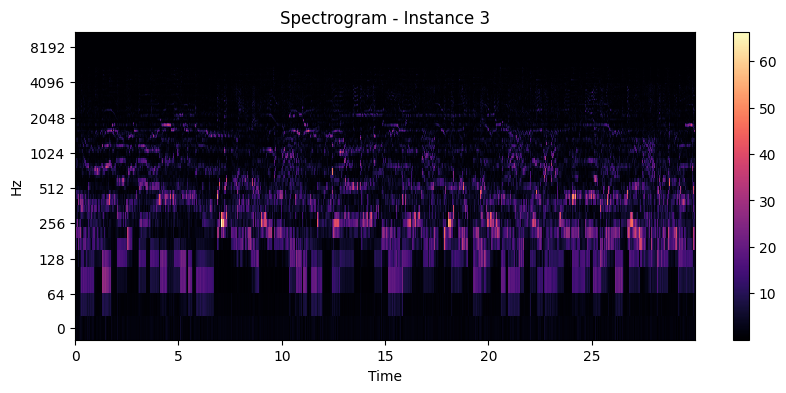

Shape:  (3, 128, 646)


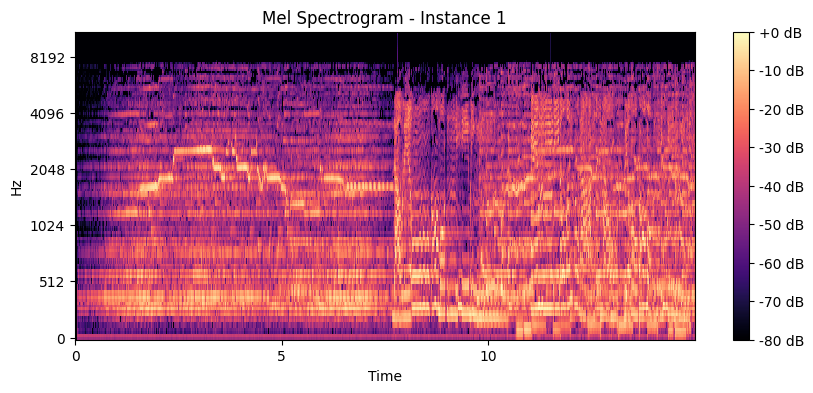

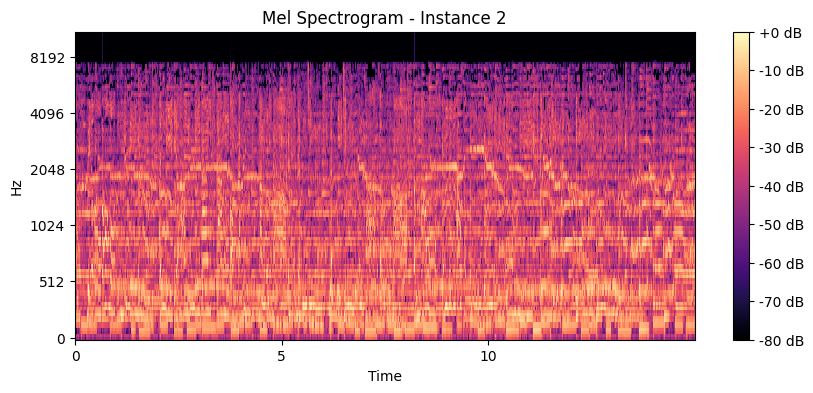

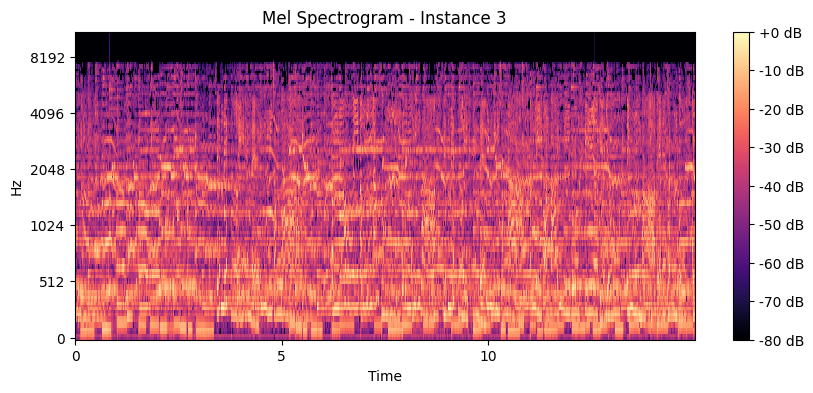

In [10]:
EDA_three_samples('cheo')

In [21]:
import gc

In [22]:
def process_batch(files_batch, wav_folder, output_folder):
    for file_name in files_batch:
        wav_path = os.path.join(wav_folder, file_name)
        try:
            # Load audio file
            y, sr = librosa.load(wav_path, sr=None)

            # STFT and Mel Spectrogram
            D = librosa.stft(y, n_fft=512, hop_length=1024)
            S = np.abs(D)
            mel_spec = librosa.feature.melspectrogram(S=S**2, sr=sr, n_fft=512, hop_length=1024, n_mels=128, fmax=8000)
            mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)

            # Save the mel spectrogram image
            output_path = os.path.join(output_folder, file_name.replace(".wav", ".png"))
            fig, ax = plt.subplots()
            img = librosa.display.specshow(mel_spec_dB, x_axis='time', y_axis='mel', ax=ax)
            ax.set_axis_off()
            fig.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the figure
            plt.close(fig)
            print(f"Đã lưu: {output_path}")

            # Handling out-of-RAM
            del y, S, mel_spec, mel_spec_dB
            gc.collect()
        except Exception as e:
            print(f"Lỗi xử lý file {file_name}: {e}")

def transform_wav_to_mel_spectrogram(wav_folder, output_folder, batch_size=10):
    os.makedirs(output_folder, exist_ok=True)
    all_files = os.listdir(wav_folder)
    for i in range(0, len(all_files), batch_size):
        batch_files = all_files[i:i + batch_size]
        process_batch(batch_files, wav_folder, output_folder)


In [23]:
wav_folder = "/content/drive/MyDrive/datasets/wav/"
output_folder = "/content/drive/MyDrive/datasets/image/"

In [24]:
transform_wav_to_mel_spectrogram(
    wav_folder + 'cailuong',
    output_folder + 'cailuong'
)

Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.051.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.009.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.005.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.003.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.029.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.012.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.010.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.066.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.047.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.006.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.018.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.019.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.040.png
Đã lưu: /content/drive/MyDrive/datasets/image/cailuong/CaiLuong.

In [26]:
list_music_genre = ['catru', 'cheo']
for music_genre in list_music_genre:
  transform_wav_to_mel_spectrogram(
      wav_folder + music_genre,
      output_folder + music_genre
  )

Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.023.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.018.png


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.006.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.013.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.027.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.002.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.025.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.011.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.030.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.005.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.004.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.003.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.015.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.028.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.022.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.009.png
Đã lưu: /content/drive/MyDrive/datasets/image/catru/Catru.024.png
Đã lưu: /c

In [ ]:
# editted for running on Drive
image_root_folder = "/content/drive/MyDrive/datasets/image/"

# Tên file CSV đầu ra
output_csv = "mel_spectrograms.csv"

# Danh sách để lưu dữ liệu
data = []

# Duyệt qua tất cả các folder con (các thể loại) trong thư mục gốc
for genre_folder in os.listdir(image_root_folder):
    genre_path = os.path.join(image_root_folder, genre_folder)

    # Kiểm tra nếu genre_path là một folder
    if os.path.isdir(genre_path):
        # Duyệt qua tất cả các file ảnh trong folder
        for file_name in os.listdir(genre_path):
            if file_name.endswith(".png"):
                # Đường dẫn đầy đủ tới ảnh
                image_path = os.path.join(genre_path, file_name)

                # Thêm thông tin Genres và Image vào danh sách
                data.append({
                    "Genres": genre_folder,  # Tên folder là thể loại
                    "Image": image_path      # Đường dẫn tới ảnh
                })

# Tạo DataFrame từ danh sách
df = pd.DataFrame(data)

df['Genres'] = df['Genres'].replace('cailuong', 'Cải Lương')
df['Genres'] = df['Genres'].replace('catru', 'Ca Trù')
df['Genres'] = df['Genres'].replace('cheo', 'Chèo')

# Lưu DataFrame vào file CSV
df.to_csv(output_csv, index=False)
print(f"Đã lưu dữ liệu vào file {output_csv}")

Đã lưu dữ liệu vào file mel_spectrograms.csv


In [ ]:
df

Genres                                              Image
0     Cải Lương  /content/drive/MyDrive/datasets/image/cailuong...
1     Cải Lương  /content/drive/MyDrive/datasets/image/cailuong...
2     Cải Lương  /content/drive/MyDrive/datasets/image/cailuong...
3     Cải Lương  /content/drive/MyDrive/datasets/image/cailuong...
4     Cải Lương  /content/drive/MyDrive/datasets/image/cailuong...
...         ...                                                ...
1494       Chèo  /content/drive/MyDrive/datasets/image/cheo/Che...
1495       Chèo  /content/drive/MyDrive/datasets/image/cheo/Che...
1496       Chèo  /content/drive/MyDrive/datasets/image/cheo/Che...
1497       Chèo  /content/drive/MyDrive/datasets/image/cheo/Che...
1498       Chèo  /content/drive/MyDrive/datasets/image/cheo/Che...

[1499 rows x 2 columns]

In [ ]:
df['Genres'].value_counts()

Genres
Cải Lương    500
Chèo         500
Ca Trù       499
Name: count, dtype: int64

# Model

Load data

In ra 1 hình và cho biết shape của nó.

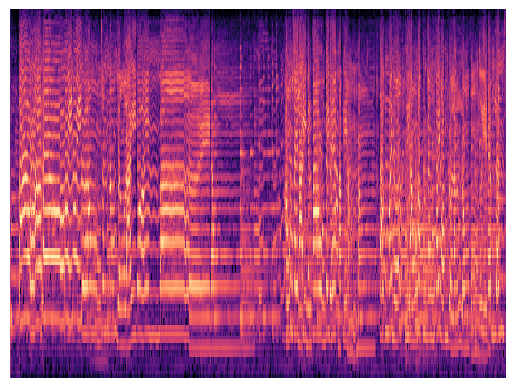

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/datasets/image/cailuong/CaiLuong.051.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
img.shape

(369, 496, 4)

Drop chiều alpha vì chiều này cho biết transparency, không cần thiết cho xử lí ảnh này. Điều này đã được hàm img_to_array xử lí.

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [12]:
def preprocess_image(image_path, target_size=(150, 250)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0

In [13]:
# Đọc file CSV
csv_file = "/content/drive/MyDrive/datasets/mel_spectrograms.csv"
df = pd.read_csv(csv_file)

# Lấy danh sách các thể loại
genres = df['Genres'].unique()
genre_to_idx = {genre: idx for idx, genre in enumerate(genres)}

# Chuyển đổi nhãn từ thể loại sang số
df['GenreIdx'] = df['Genres'].map(genre_to_idx)

# Tiền xử lý tất cả ảnh và nhãn
images = np.array([preprocess_image(img_path) for img_path in df['Image']])

In [14]:
images.shape

(1499, 150, 250, 3)

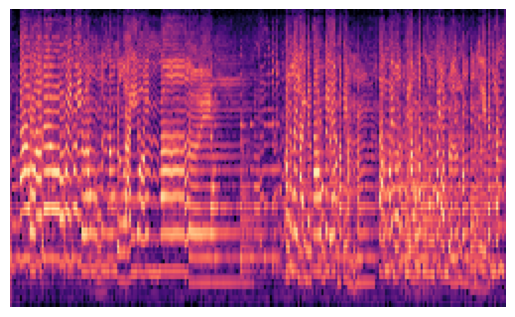

In [15]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [19]:
labels = to_categorical(df['GenreIdx'], num_classes=len(genres))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42, shuffle = True)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42, shuffle = True)

## ***Helper functions***

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

def plotting_training_phase(model_history):
  '''
  Hàm dùng để vẽ biểu đồ acc và loss của các model.
  '''
  plt.plot(model_history.history['accuracy'])
  plt.plot(model_history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('loss accuracy')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['loss', 'val_loss'], loc='upper left')
  plt.show()

def plotting_metrics(model, X_test=X_test):
  # Chuyển đổi y_test từ one-hot encoding về dạng nhãn
  y_test_label = np.argmax(y_test, axis=-1)
  y_pred = model.predict(X_test)
  y_pred_label = np.argmax(y_pred, axis=-1)

  # Metrics
  # Computes the F1-score for each class independently and averages them. Treats all classes equally, regardless of size.
  recall = recall_score(y_test_label, y_pred_label, average='macro') * 100
  precision = precision_score(y_test_label, y_pred_label, average='macro') * 100
  f1 = f1_score(y_test_label, y_pred_label, average='macro') * 100
  cm = confusion_matrix(y_test_label, y_pred_label)
  print('F1 score:', f1)
  print('Recall:', recall)
  print('Precision:', precision)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  result_df = pd.DataFrame({
    'Actual': [genres[idx] for idx in y_test_label],
    'Predicted': [genres[idx] for idx in y_pred_label]
  })

  print(result_df)

def saving_model(model, model_name):
  model_folder_link = '/content/drive/MyDrive/models'
  if not os.path.exists(model_folder_link):
    os.mkdir(model_folder_link)
  model.save(model_folder_link + '/' + model_name)
  print("Đã lưu mô hình.")

## ***Model tự build***

### ***Model 0***

#### ***Resize 150 x 250***

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model_0_1 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(150, 250, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(genres), activation='softmax')
])

model_0_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_0_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 246, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 123, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 121, 32)         │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 58, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 29696)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29696)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,801,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,839,843 (14.65 MB)

 Trainable params: 3,839,843 (14.65 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss', patience= 5, verbose= 1, mode='auto', baseline= None, restore_best_weights= True)

In [24]:
# Huấn luyện mô hình
history_0_1 = model_0_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev, y_dev),
    callbacks = callbacks
)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.5706 - loss: 0.8782 - val_accuracy: 0.8733 - val_loss: 0.4537
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8545 - loss: 0.3554 - val_accuracy: 0.9267 - val_loss: 0.2052
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9304 - loss: 0.1784 - val_accuracy: 0.9200 - val_loss: 0.2148
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9462 - loss: 0.1586 - val_accuracy: 0.9467 - val_loss: 0.1376
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9619 - loss: 0.0970 - val_accuracy: 0.9467 - val_loss: 0.1050
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9848 - loss: 0.0394 - val_accuracy: 0.9400 - val_loss: 0.1796
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9893 - loss: 0.0386 - val_accuracy: 0.9533 - val_loss: 0.1256
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9946 - loss: 0.0162 - val_accuracy: 0.9467 -

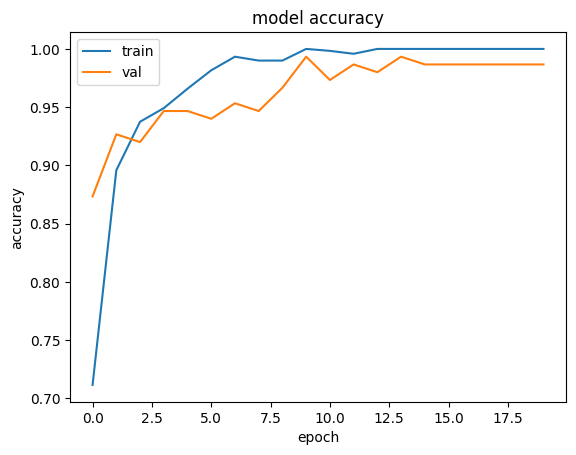

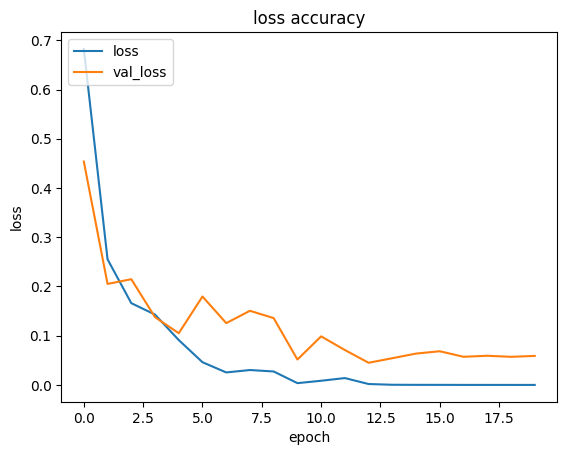

In [25]:
plotting_training_phase(history_0_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
F1 score: 98.66666666666667
Recall: 98.66666666666667
Precision: 98.66666666666667


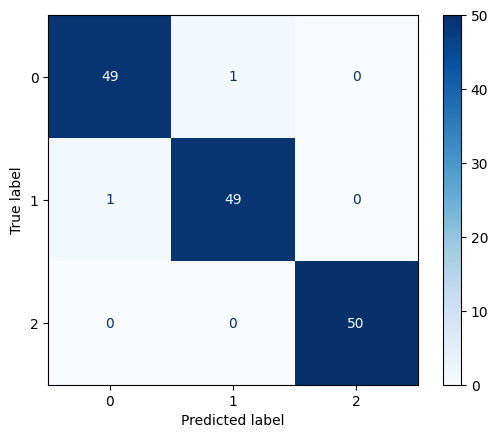

        Actual  Predicted
0       Ca Trù     Ca Trù
1       Ca Trù     Ca Trù
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù     Ca Trù
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương  Cải Lương
149  Cải Lương  Cải Lương

[150 rows x 2 columns]


In [26]:
plotting_metrics(model_0_1)

In [29]:
saving_model(model_0_1, 'music_genre_classifier.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [30]:
import tensorflow as tf

# Thay đổi kích thước X_train, X_dev và X_test
X_train_resized = tf.image.resize(X_train, (224, 224))
X_dev_resized = tf.image.resize(X_dev, (224, 224))
X_test_resized = tf.image.resize(X_test, (224, 224))

In [31]:
print(X_train_resized.shape)

(1199, 224, 224, 3)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model_0_2 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(genres), activation='softmax')
])

model_0_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_0_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,576,547 (21.27 MB)

 Trainable params: 5,576,547 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Huấn luyện mô hình
history_0_2 = model_0_2.fit(
    X_train_resized, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_resized, y_dev),
    callbacks = callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 0.4943 - loss: 1.0026 - val_accuracy: 0.8000 - val_loss: 0.4178
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8710 - loss: 0.3666 - val_accuracy: 0.9067 - val_loss: 0.2244
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9358 - loss: 0.1745 - val_accuracy: 0.9467 - val_loss: 0.1314
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9642 - loss: 0.1020 - val_accuracy: 0.9400 - val_loss: 0.1131
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9608 - loss: 0.0935 - val_accuracy: 0.9533 - val_loss: 0.1406
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


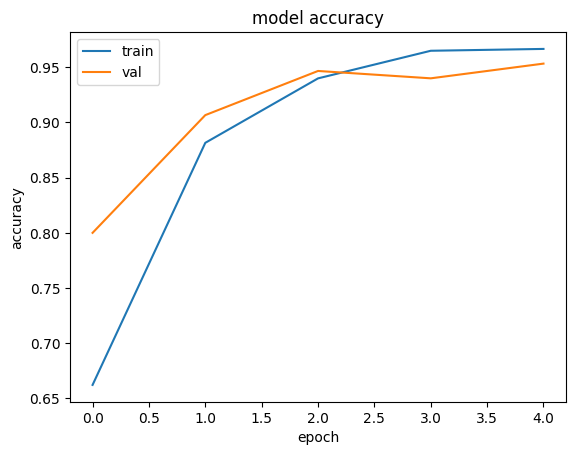

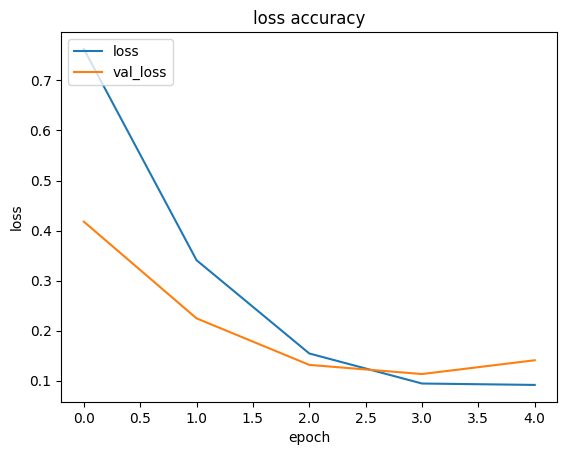

In [34]:
plotting_training_phase(history_0_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
F1 score: 84.72771190162494
Recall: 84.66666666666667
Precision: 87.84461152882206


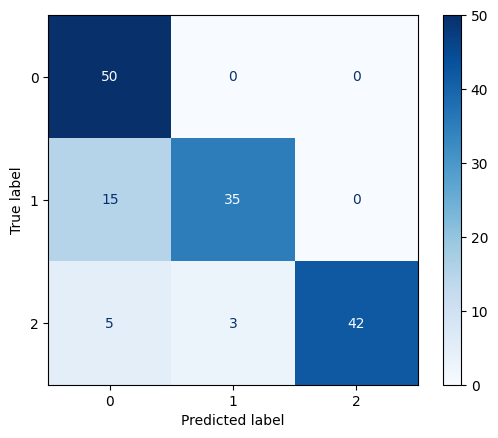

        Actual  Predicted
0       Ca Trù     Ca Trù
1       Ca Trù  Cải Lương
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù     Ca Trù
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương  Cải Lương
149  Cải Lương  Cải Lương

[150 rows x 2 columns]


In [35]:
plotting_metrics(model_0_2, X_test=X_test_resized)

In [36]:
saving_model(model_0_2, 'music_genre_classifier_1.h5')

Đã lưu mô hình.


### ***Model 1***

#### ***Resize 150 x 250***

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

model_1_1 = Sequential([
    # First convolutional layer
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 250, 3)),
    MaxPooling2D(2, 2),
    # Second convolutional layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Third convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Output layer
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(genres), activation='softmax')
])

model_1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 248, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 124, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 122, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 61, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 59, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 31552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 31552)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       8,077,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,135,971 (31.04 MB)

 Trainable params: 8,135,203 (31.03 MB)

 Non-trainable params: 768 (3.00 KB)

In [38]:
# Huấn luyện mô hình
history_1_1 = model_1_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev, y_dev),
    callbacks = callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 355ms/step - accuracy: 0.6387 - loss: 0.8990 - val_accuracy: 0.9200 - val_loss: 0.3946
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9147 - loss: 0.2465 - val_accuracy: 0.8800 - val_loss: 0.3607
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9354 - loss: 0.1660 - val_accuracy: 0.9333 - val_loss: 0.2460
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9436 - loss: 0.1287 - val_accuracy: 0.8400 - val_loss: 0.3906
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9846 - loss: 0.0626 - val_accuracy: 0.9467 - val_loss: 0.1421
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


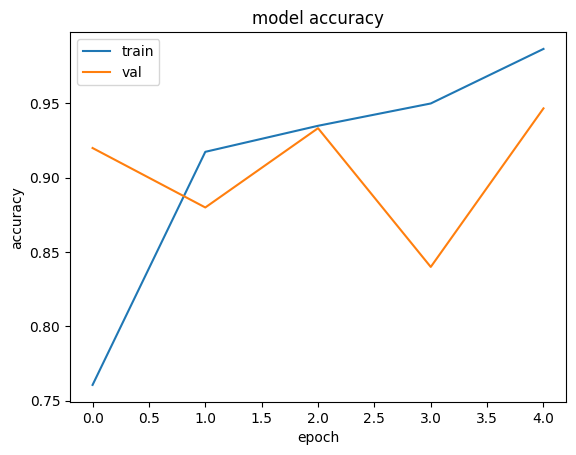

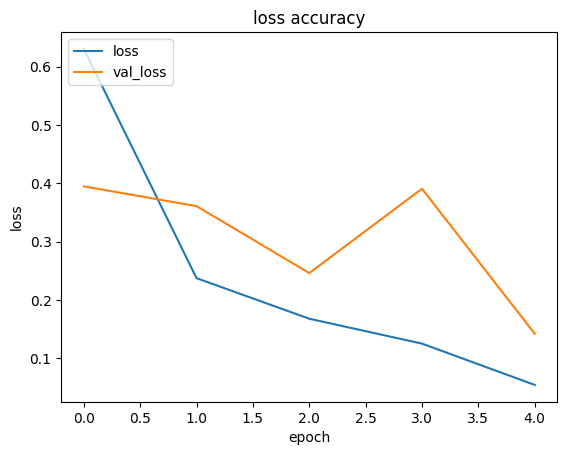

In [39]:
plotting_training_phase(history_1_1)

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
F1 score: 94.02576150735209
Recall: 94.0
Precision: 94.28030303030303


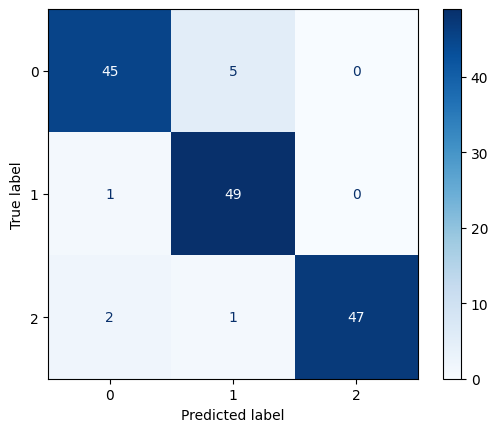

        Actual  Predicted
0       Ca Trù     Ca Trù
1       Ca Trù     Ca Trù
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù     Ca Trù
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương  Cải Lương
149  Cải Lương  Cải Lương

[150 rows x 2 columns]


In [40]:
plotting_metrics(model_1_1)

In [41]:
saving_model(model_1_1, 'music_genre_classifier_1.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout, Dense

model_1_2 = Sequential([
    # First convolutional layer
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    # Second convolutional layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Third convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Output layer
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(genres), activation='softmax')
])

model_1_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      11,075,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,134,243 (42.47 MB)

 Trainable params: 11,133,475 (42.47 MB)

 Non-trainable params: 768 (3.00 KB)

In [43]:
# Huấn luyện mô hình
history_1_2 = model_1_2.fit(
    X_train_resized, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_resized, y_dev),
    callbacks = callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 367ms/step - accuracy: 0.6862 - loss: 0.7858 - val_accuracy: 0.6467 - val_loss: 0.7397
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9136 - loss: 0.2252 - val_accuracy: 0.8733 - val_loss: 0.4112
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9694 - loss: 0.0910 - val_accuracy: 0.8667 - val_loss: 0.3455
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9784 - loss: 0.0729 - val_accuracy: 0.8267 - val_loss: 0.5110
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9644 - loss: 0.1046 - val_accuracy: 0.8867 - val_loss: 0.3660
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


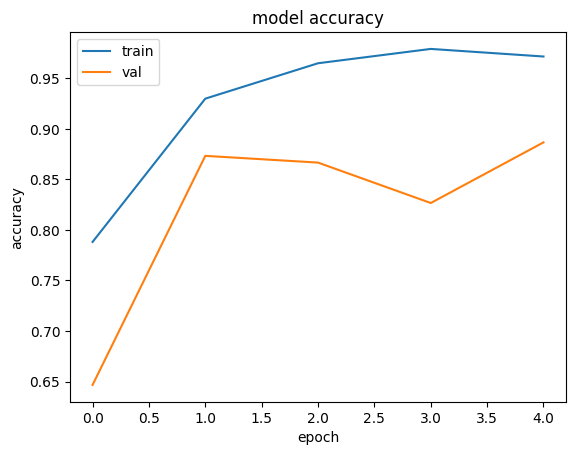

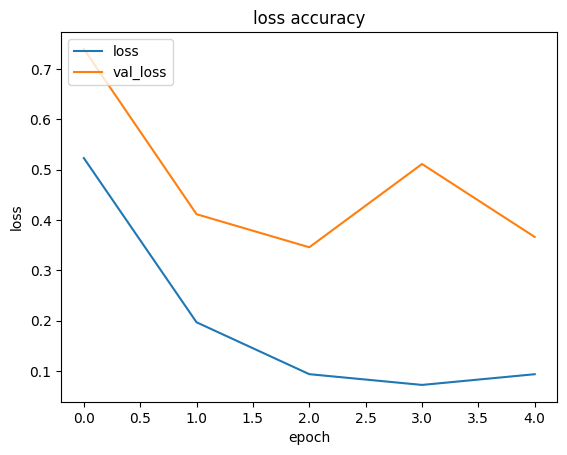

In [44]:
plotting_training_phase(history_1_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 score: 54.08889787300946
Recall: 64.66666666666666
Precision: 49.51456310679612


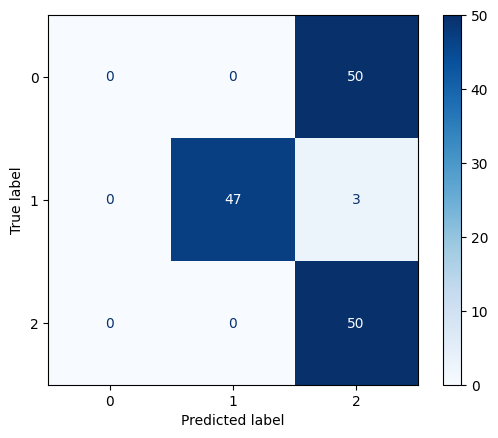

        Actual Predicted
0       Ca Trù    Ca Trù
1       Ca Trù    Ca Trù
2         Chèo      Chèo
3    Cải Lương      Chèo
4       Ca Trù    Ca Trù
..         ...       ...
145  Cải Lương      Chèo
146       Chèo      Chèo
147       Chèo      Chèo
148  Cải Lương      Chèo
149  Cải Lương      Chèo

[150 rows x 2 columns]


In [45]:
plotting_metrics(model_1_2, X_test=X_test_resized)

In [46]:
saving_model(model_1_2, 'music_genre_classifier_2.h5')

Đã lưu mô hình.


## ***VGG16***

#### ***Resize 150 x 250***

In [47]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [48]:
# Tải VGG16 pre-trained model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 250, 3))

# Freeze các tầng của VGG16
for layer in vgg16_base.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [49]:
# Xây dựng mô hình
model_2_1 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(genres), activation='softmax')  # Output layer
])

# Compile mô hình
model_2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Xem cấu trúc mô hình
model_2_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [50]:
# Huấn luyện mô hình
history_2_1 = model_2_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev, y_dev)
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 54s 943ms/step - accuracy: 0.4161 - loss: 1.1044 - val_accuracy: 0.7467 - val_loss: 0.6718
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.7705 - loss: 0.6334 - val_accuracy: 0.7933 - val_loss: 0.5568
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.8013 - loss: 0.5430 - val_accuracy: 0.8000 - val_loss: 0.4885
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.8198 - loss: 0.4834 - val_accuracy: 0.8200 - val_loss: 0.4386
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8353 - loss: 0.4640 - val_accuracy: 0.8267 - val_loss: 0.4021
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8657 - loss: 0.3804 - val_accuracy: 0.8400 - val_loss: 0.3708
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8548 - loss: 0.3646 - val_accuracy: 0.8600 - val_loss: 0.3585
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8821 - loss: 0.3214 - val_accuracy: 0

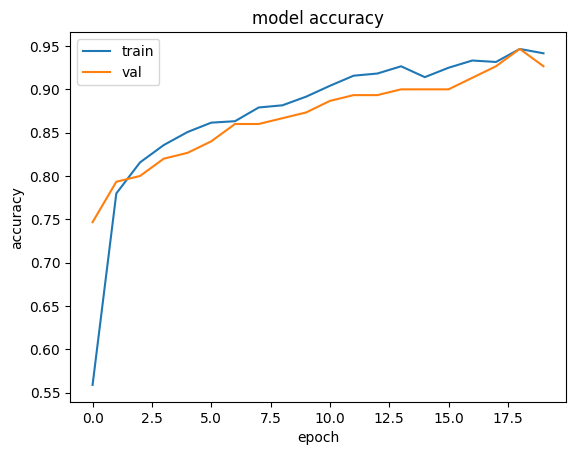

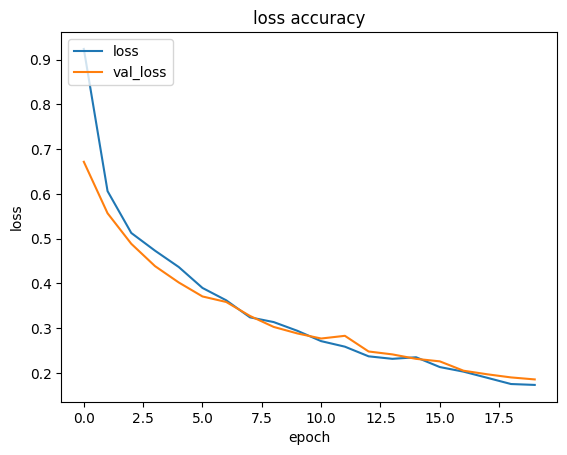

In [51]:
plotting_training_phase(history_2_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
F1 score: 90.67280061339467
Recall: 90.66666666666667
Precision: 90.69120981726023


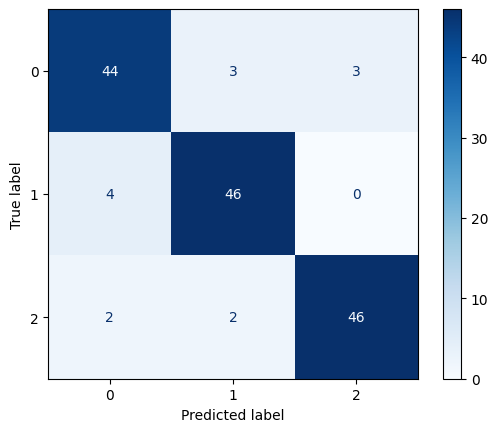

        Actual  Predicted
0       Ca Trù     Ca Trù
1       Ca Trù  Cải Lương
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù     Ca Trù
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương       Chèo
149  Cải Lương     Ca Trù

[150 rows x 2 columns]


In [52]:
plotting_metrics(model_2_1, X_test=X_test)

In [53]:
saving_model(model_2_1, 'music_genre_classifier_vgg16_1.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [54]:
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

# Chuẩn hóa dữ liệu
X_train_preprocessed = preprocess_input(X_train_resized)
X_dev_preprocessed = preprocess_input(X_dev_resized)
X_test_preprocessed = preprocess_input(X_test_resized)

In [55]:
# Tải VGG16 pre-trained model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze các tầng của VGG16
for layer in vgg16_base.layers:
    layer.trainable = False


In [56]:
# Xây dựng mô hình
model_2_2 = Sequential([
    vgg16_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(genres), activation='softmax')  # Output layer
])

# Compile mô hình
model_2_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Xem cấu trúc mô hình
model_2_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [57]:
# Huấn luyện mô hình
history_2_2 = model_2_2.fit(
    X_train_preprocessed, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_preprocessed, y_dev)
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 801ms/step - accuracy: 0.3673 - loss: 1.5222 - val_accuracy: 0.3333 - val_loss: 1.1199
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.3480 - loss: 1.2446 - val_accuracy: 0.3333 - val_loss: 1.1305
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.3421 - loss: 1.1839 - val_accuracy: 0.3400 - val_loss: 1.0952
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.3167 - loss: 1.1361 - val_accuracy: 0.3400 - val_loss: 1.1061
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.3171 - loss: 1.1272 - val_accuracy: 0.3867 - val_loss: 1.0941
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.3709 - loss: 1.1062 - val_accuracy: 0.3467 - val_loss: 1.0960
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.3227 - loss: 1.1060 - val_accuracy: 0.3400 - val_loss: 1.0984
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.3519 - loss: 1.1037 - val_accuracy

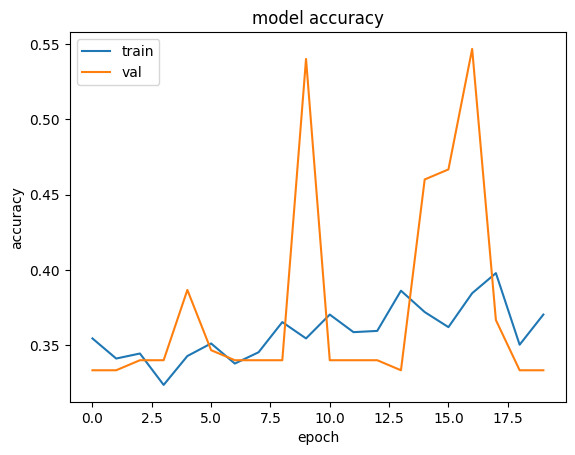

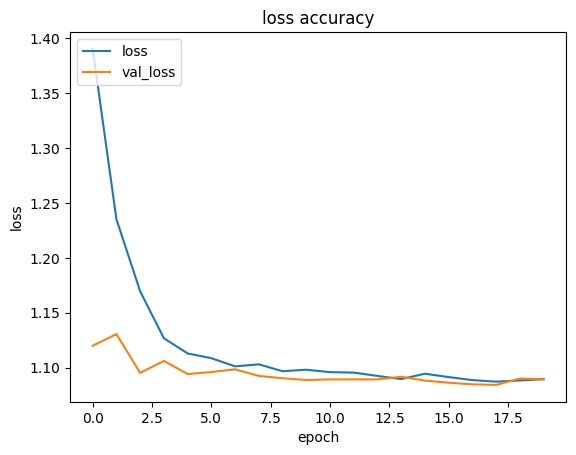

In [58]:
plotting_training_phase(history_2_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
F1 score: 16.666666666666664
Recall: 33.33333333333333
Precision: 11.11111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


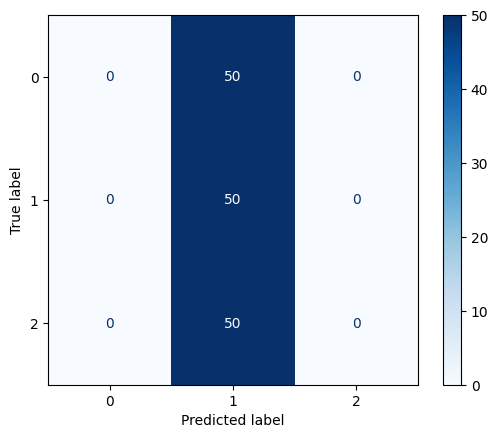

        Actual Predicted
0       Ca Trù    Ca Trù
1       Ca Trù    Ca Trù
2         Chèo    Ca Trù
3    Cải Lương    Ca Trù
4       Ca Trù    Ca Trù
..         ...       ...
145  Cải Lương    Ca Trù
146       Chèo    Ca Trù
147       Chèo    Ca Trù
148  Cải Lương    Ca Trù
149  Cải Lương    Ca Trù

[150 rows x 2 columns]


In [59]:
plotting_metrics(model_2_2, X_test=X_test_preprocessed)

In [60]:
saving_model(model_2_2, 'music_genre_classifier_vgg16_2.h5')

Đã lưu mô hình.


## ***EfficientNetB0***

#### ***Resize 150 x 250***

In [61]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 250, 3))
model_3_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer cho 3 nhãn
])

# Compile mô hình
model_3_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Xem cấu trúc mô hình
model_3_1.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 5, 8, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 4,171,903 (15.91 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [62]:
# Huấn luyện mô hình
history_3_1 = model_3_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev, y_dev),
    callbacks = callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8025 - loss: 0.4531 - val_accuracy: 0.3333 - val_loss: 1.1439
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 118ms/step - accuracy: 0.9685 - loss: 0.0978 - val_accuracy: 0.3333 - val_loss: 2.1271
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9814 - loss: 0.0610 - val_accuracy: 0.3333 - val_loss: 1.8419
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9837 - loss: 0.0827 - val_accuracy: 0.3333 - val_loss: 1.5002
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.3333 - val_loss: 2.2958
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


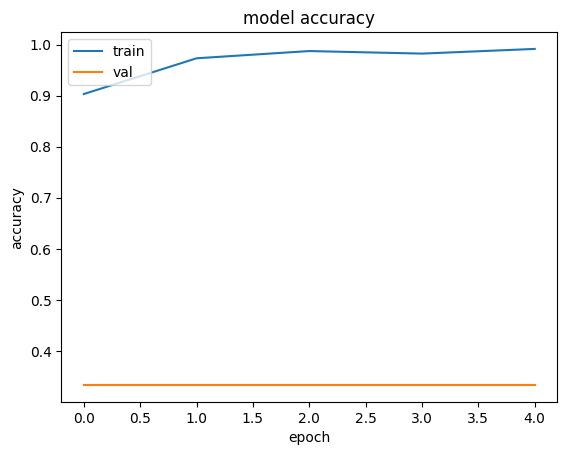

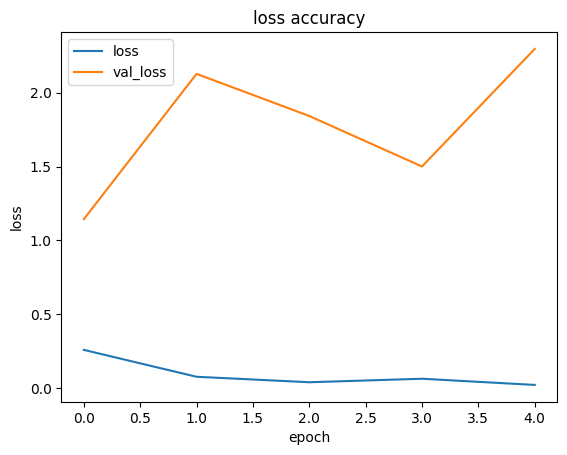

In [63]:
plotting_training_phase(history_3_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
F1 score: 16.666666666666664
Recall: 33.33333333333333
Precision: 11.11111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


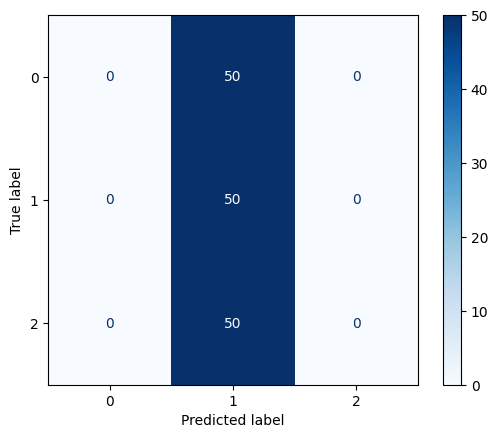

        Actual Predicted
0       Ca Trù    Ca Trù
1       Ca Trù    Ca Trù
2         Chèo    Ca Trù
3    Cải Lương    Ca Trù
4       Ca Trù    Ca Trù
..         ...       ...
145  Cải Lương    Ca Trù
146       Chèo    Ca Trù
147       Chèo    Ca Trù
148  Cải Lương    Ca Trù
149  Cải Lương    Ca Trù

[150 rows x 2 columns]


In [64]:
plotting_metrics(model_3_1, X_test=X_test)

In [65]:
saving_model(model_3_1, 'music_genre_classifier_efficientnet.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [66]:
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf


# Chuẩn hóa dữ liệu
X_train_preprocessed = preprocess_input(X_train_resized)
X_dev_preprocessed = preprocess_input(X_dev_resized)
X_test_preprocessed = preprocess_input(X_test_resized)

In [67]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_3_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer cho 3 nhãn
])

# Compile mô hình
model_3_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Xem cấu trúc mô hình
model_3_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 4,171,903 (15.91 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [68]:
# Huấn luyện mô hình
history_3_2 = model_3_2.fit(
    X_train_preprocessed, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_preprocessed, y_dev),
    callbacks = callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8368 - loss: 0.4207 - val_accuracy: 0.3333 - val_loss: 2.3168
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9750 - loss: 0.0851 - val_accuracy: 0.3333 - val_loss: 4.7098
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.9857 - loss: 0.0352 - val_accuracy: 0.3333 - val_loss: 3.4371
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.3333 - val_loss: 4.9919
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9839 - loss: 0.0695 - val_accuracy: 0.3333 - val_loss: 1.8149
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


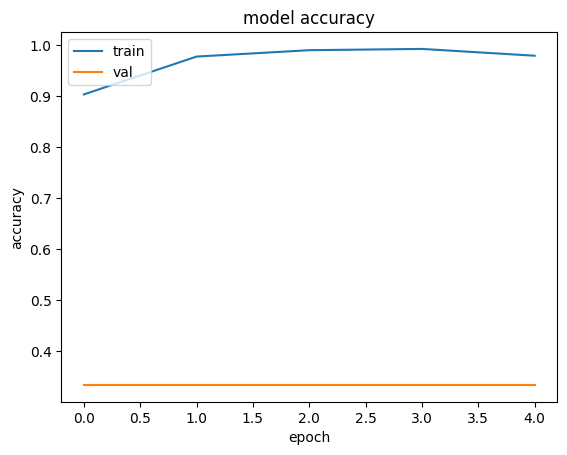

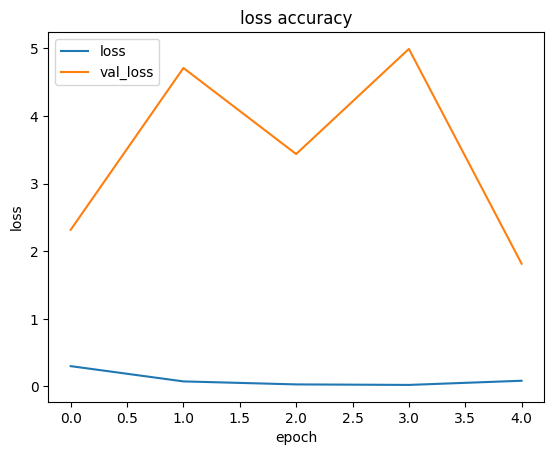

In [69]:
plotting_training_phase(history_3_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
F1 score: 16.666666666666664
Recall: 33.33333333333333
Precision: 11.11111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


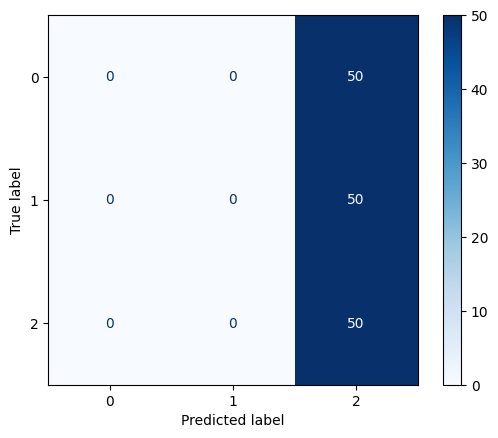

        Actual Predicted
0       Ca Trù      Chèo
1       Ca Trù      Chèo
2         Chèo      Chèo
3    Cải Lương      Chèo
4       Ca Trù      Chèo
..         ...       ...
145  Cải Lương      Chèo
146       Chèo      Chèo
147       Chèo      Chèo
148  Cải Lương      Chèo
149  Cải Lương      Chèo

[150 rows x 2 columns]


In [70]:
plotting_metrics(model_3_2, X_test=X_test_preprocessed)

In [71]:
saving_model(model_3_2, 'music_genre_classifier_efficientnet_2.h5')

Đã lưu mô hình.


## ***ConvNeXt***

#### ***Resize 150 x 250***

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.applications.convnext import preprocess_input

# Tải ConvNeXt-Tiny pre-trained
base_model = ConvNeXtTiny(
    weights='imagenet',  # Sử dụng trọng số pre-trained
    include_top=False,   # Loại bỏ fully-connected layers cuối
    input_shape=(150, 250, 3)
)

# Freeze các lớp trong base model (optional, dùng khi fine-tuning)
base_model.trainable = False  # Đóng băng base model để chỉ train phần custom

# Xây dựng mô hình
model_4_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Phẳng hóa đầu ra
    Dense(128, activation='relu'),
    Dropout(0.3),              # Regularization
    Dense(3, activation='softmax')  # Output layer với 3 nhãn
])

# Compile mô hình
model_4_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Xem cấu trúc mô hình
model_4_1.summary()

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)           │ (None, 4, 7, 768)           │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 768)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,918,947 (106.50 MB)

 Trainable params: 98,819 (386.01 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss', patience= 5, verbose= 1, mode='auto', baseline= None, restore_best_weights= True)

In [74]:
# Huấn luyện mô hình
history_4_1 = model_4_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev, y_dev),
    callbacks= callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 568ms/step - accuracy: 0.4175 - loss: 1.1873 - val_accuracy: 0.5667 - val_loss: 0.8745
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - accuracy: 0.6177 - loss: 0.8667 - val_accuracy: 0.7133 - val_loss: 0.7766
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7103 - loss: 0.7383 - val_accuracy: 0.7667 - val_loss: 0.6785
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7453 - loss: 0.6668 - val_accuracy: 0.7733 - val_loss: 0.6074
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7888 - loss: 0.5947 - val_accuracy: 0.7933 - val_loss: 0.5515
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7974 - loss: 0.5474 - val_accuracy: 0.8400 - val_loss: 0.4831
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8304 - loss: 0.4866 - val_accuracy: 0.8800 - val_loss: 0.4474
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8498 - loss: 0.4727 - val_accuracy: 

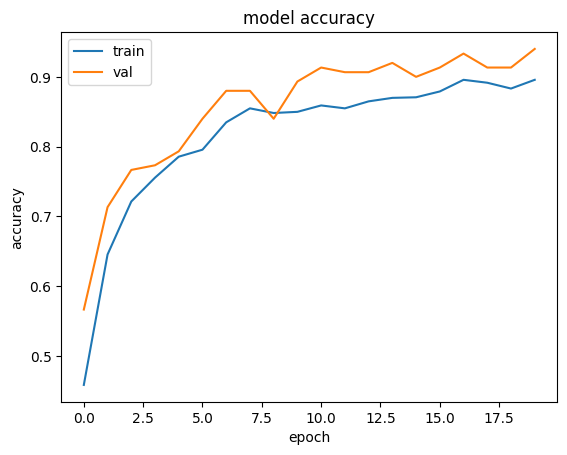

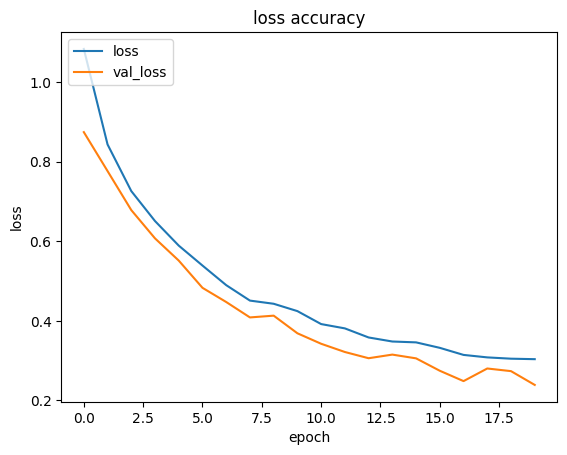

In [75]:
plotting_training_phase(history_4_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 834ms/step
F1 score: 87.42804387965678
Recall: 87.33333333333334
Precision: 88.16233791030447


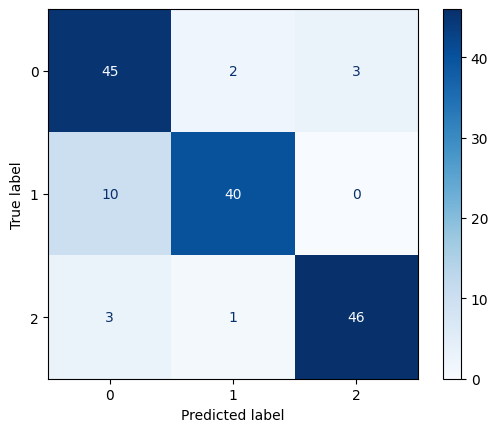

        Actual  Predicted
0       Ca Trù     Ca Trù
1       Ca Trù  Cải Lương
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù     Ca Trù
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương  Cải Lương
149  Cải Lương  Cải Lương

[150 rows x 2 columns]


In [76]:
plotting_metrics(model_4_1, X_test=X_test)

In [77]:
saving_model(model_4_1, 'music_genre_classifier_convnext_tiny.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [78]:
from tensorflow.keras.applications.convnext import preprocess_input
import tensorflow as tf

# Chuẩn hóa dữ liệu
X_train_preprocessed = preprocess_input(X_train_resized)
X_dev_preprocessed = preprocess_input(X_dev_resized)
X_test_preprocessed = preprocess_input(X_test_resized)

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.applications.convnext import preprocess_input

# Tải ConvNeXt-Tiny pre-trained
base_model = ConvNeXtTiny(
    weights='imagenet',  # Sử dụng trọng số pre-trained
    include_top=False,   # Loại bỏ fully-connected layers cuối
    input_shape=(224, 224, 3)
)

# Freeze các lớp trong base model (optional, dùng khi fine-tuning)
base_model.trainable = False  # Đóng băng base model để chỉ train phần custom

# Xây dựng mô hình
model_4_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Phẳng hóa đầu ra
    Dense(128, activation='relu'),
    Dropout(0.3),              # Regularization
    Dense(3, activation='softmax')  # Output layer với 3 nhãn
])

# Compile mô hình
model_4_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Xem cấu trúc mô hình
model_4_2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_tiny (Functional)           │ (None, 7, 7, 768)           │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 768)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,918,947 (106.50 MB)

 Trainable params: 98,819 (386.01 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

In [80]:
# Huấn luyện mô hình
history_4_2 = model_4_2.fit(
    X_train_preprocessed, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_preprocessed, y_dev),
    callbacks= callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 478ms/step - accuracy: 0.3680 - loss: 1.3759 - val_accuracy: 0.5333 - val_loss: 1.0221
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.4284 - loss: 1.0527 - val_accuracy: 0.5400 - val_loss: 0.9731
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.5254 - loss: 0.9863 - val_accuracy: 0.4067 - val_loss: 0.9802
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.5286 - loss: 0.9501 - val_accuracy: 0.5333 - val_loss: 0.9142
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.6133 - loss: 0.9030 - val_accuracy: 0.6333 - val_loss: 0.8739
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


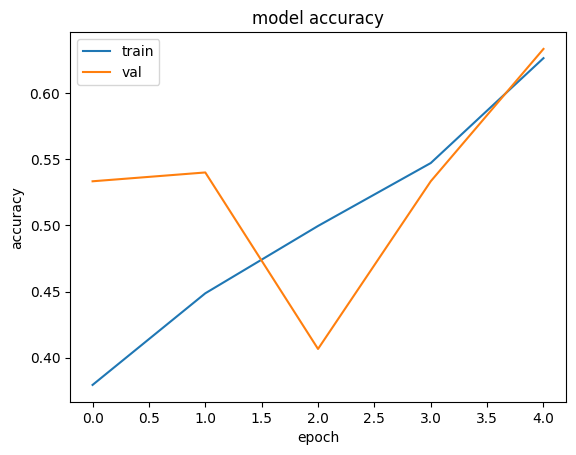

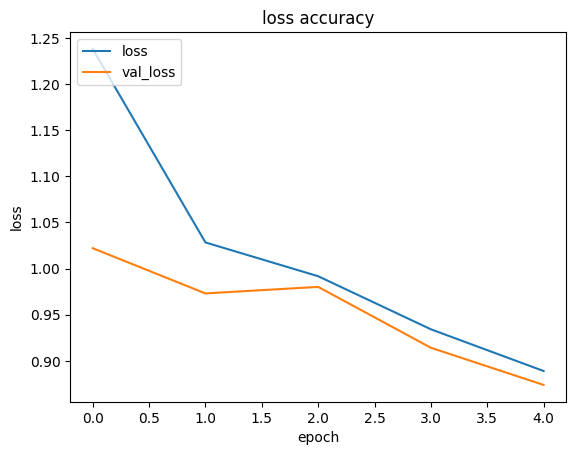

In [81]:
plotting_training_phase(history_4_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 893ms/step
F1 score: 47.014943692657035
Recall: 50.66666666666667
Precision: 52.42823370482945


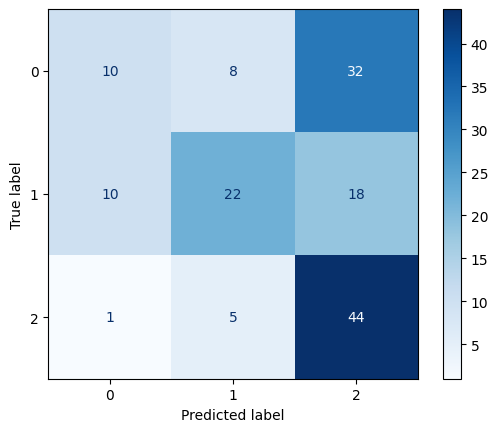

        Actual Predicted
0       Ca Trù    Ca Trù
1       Ca Trù      Chèo
2         Chèo      Chèo
3    Cải Lương    Ca Trù
4       Ca Trù      Chèo
..         ...       ...
145  Cải Lương      Chèo
146       Chèo      Chèo
147       Chèo      Chèo
148  Cải Lương    Ca Trù
149  Cải Lương      Chèo

[150 rows x 2 columns]


In [82]:
plotting_metrics(model_4_2, X_test=X_test_preprocessed)

In [83]:
saving_model(model_4_2, 'music_genre_classifier_convnext_tiny_2.h5')

Đã lưu mô hình.


## ***ResNet50***

#### ***Resize 150 x 250***

In [84]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

In [85]:
# Tải ResNet34 hoặc ResNet50
base_model = ResNet50(
    weights='imagenet',  # Pre-trained trên ImageNet
    include_top=False,   # Loại bỏ fully-connected layers cuối
    input_shape=(150, 250, 3)
)

# Đóng băng base model
base_model.trainable = False

# Xây dựng mô hình
model_5_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Phẳng hóa đầu ra
    Dense(128, activation='relu'),
    Dropout(0.3),              # Regularization
    Dense(3, activation='softmax')  # Output layer với 3 nhãn
])

# Compile mô hình
model_5_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Xem cấu trúc mô hình
model_5_1.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [86]:
history_5_1 = model_5_1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_dev, y_dev),
    callbacks = callbacks
)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 410ms/step - accuracy: 0.3570 - loss: 1.2702 - val_accuracy: 0.5133 - val_loss: 1.0742
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.3785 - loss: 1.1073 - val_accuracy: 0.4067 - val_loss: 1.0591
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4292 - loss: 1.0704 - val_accuracy: 0.3933 - val_loss: 1.0486
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.4420 - loss: 1.0529 - val_accuracy: 0.5533 - val_loss: 1.0306
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4796 - loss: 1.0335 - val_accuracy: 0.5933 - val_loss: 1.0097
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


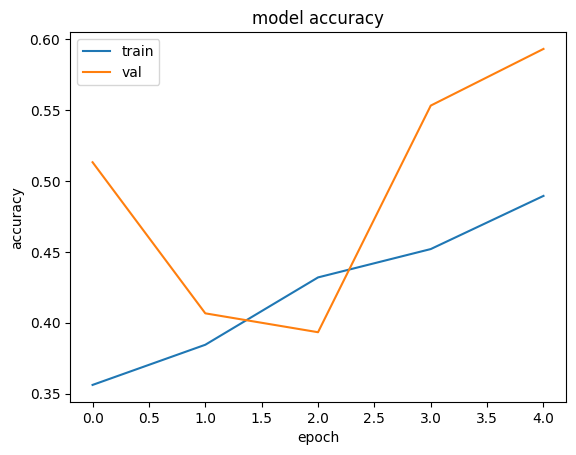

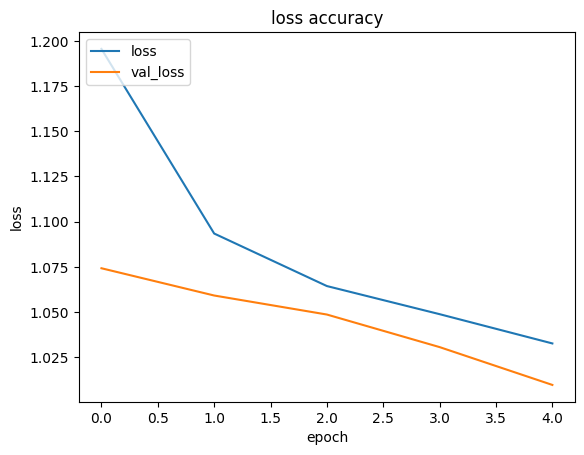

In [87]:
plotting_training_phase(history_5_1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
F1 score: 43.69531652084406
Recall: 54.0
Precision: 36.904761904761905


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


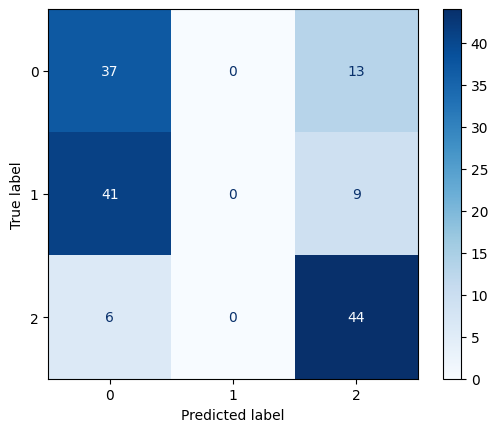

        Actual  Predicted
0       Ca Trù  Cải Lương
1       Ca Trù  Cải Lương
2         Chèo       Chèo
3    Cải Lương  Cải Lương
4       Ca Trù       Chèo
..         ...        ...
145  Cải Lương  Cải Lương
146       Chèo       Chèo
147       Chèo       Chèo
148  Cải Lương       Chèo
149  Cải Lương       Chèo

[150 rows x 2 columns]


In [88]:
plotting_metrics(model_5_1, X_test=X_test)

In [89]:
saving_model(model_5_1, 'music_genre_classifier_resnet50.h5')

Đã lưu mô hình.


#### ***Resize 224 x 224***

In [90]:
from tensorflow.keras.applications.resnet import preprocess_input
import tensorflow as tf

# Chuẩn hóa dữ liệu
X_train_preprocessed = preprocess_input(X_train_resized)
X_dev_preprocessed = preprocess_input(X_dev_resized)
X_test_preprocessed = preprocess_input(X_test_resized)

In [91]:
# Tải ResNet34 hoặc ResNet50
base_model = ResNet50(
    weights='imagenet',  # Pre-trained trên ImageNet
    include_top=False,   # Loại bỏ fully-connected layers cuối
    input_shape=(224, 224, 3)
)

# Đóng băng base model
base_model.trainable = False

# Xây dựng mô hình
model_5_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Phẳng hóa đầu ra
    Dense(128, activation='relu'),
    Dropout(0.3),              # Regularization
    Dense(3, activation='softmax')  # Output layer với 3 nhãn
])

# Compile mô hình
model_5_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Xem cấu trúc mô hình
model_5_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,371 (90.98 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [92]:
# Huấn luyện mô hình
history_5_2 = model_5_2.fit(
    X_train_preprocessed, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_dev_preprocessed, y_dev),
    callbacks= callbacks
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 519ms/step - accuracy: 0.3507 - loss: 1.2113 - val_accuracy: 0.3333 - val_loss: 1.1094
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.3598 - loss: 1.1074 - val_accuracy: 0.5000 - val_loss: 1.1043
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.3364 - loss: 1.1220 - val_accuracy: 0.3333 - val_loss: 1.0903
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.3943 - loss: 1.0882 - val_accuracy: 0.4867 - val_loss: 1.0848
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.3773 - loss: 1.0901 - val_accuracy: 0.3333 - val_loss: 1.0898
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


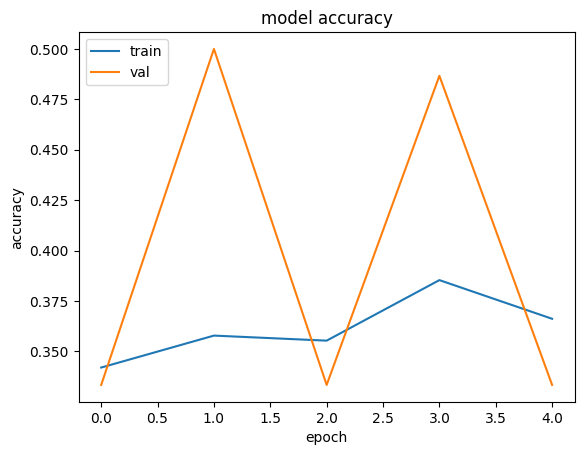

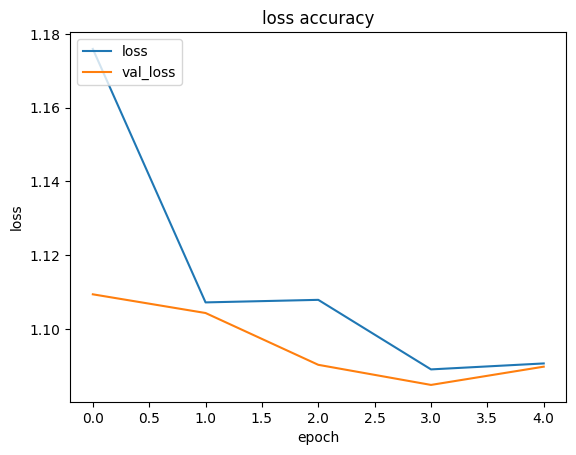

In [93]:
plotting_training_phase(history_5_2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 826ms/step
F1 score: 16.666666666666664
Recall: 33.33333333333333
Precision: 11.11111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


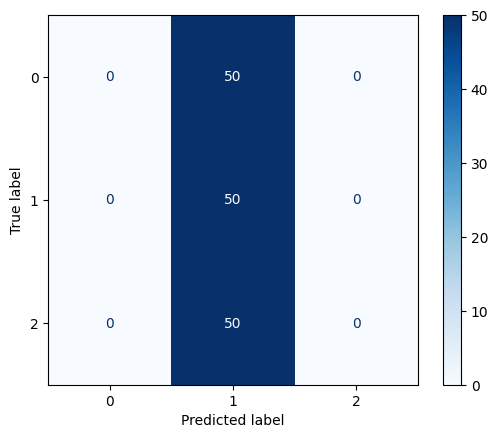

        Actual Predicted
0       Ca Trù    Ca Trù
1       Ca Trù    Ca Trù
2         Chèo    Ca Trù
3    Cải Lương    Ca Trù
4       Ca Trù    Ca Trù
..         ...       ...
145  Cải Lương    Ca Trù
146       Chèo    Ca Trù
147       Chèo    Ca Trù
148  Cải Lương    Ca Trù
149  Cải Lương    Ca Trù

[150 rows x 2 columns]


In [94]:
plotting_metrics(model_5_2, X_test=X_test_preprocessed)

In [95]:
saving_model(model_5_2, 'music_genre_classifier_resnet50.h5')

Đã lưu mô hình.
